In [1]:
import numpy as np # importing numpy for matrix operations 
from scipy import *
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display 
import itertools
from IPython.display import display

# Simulation & The Economic Model Framework


### - market: containership market


### - Route : .... ??


### - Candidate Firms: 
1. APM-Maersk
2. MSC – Mediterranean Shipping Company
3. COSCO – China Ocean Shipping Company
4. CMA-CGM
5. Hapag-Lloyd
6. ONE  – Ocean Network Express
7. Evergreen Line
8. Hyundai Merchant Marine
9. Yang Ming Marine Transport
10. Zim Integrated Shipping Services Ltd

# I.Benchmark Case: All Singletons Business as usual model

## Sub_model 1: Market Demand

* The market is faced with the following demand function:  Source: (Parry et al., 2018)
$$ Y_t  = (\frac{GDP_t}{GDP_0})^v * (\frac{P_t}{P_0})^η * Y_0  $$

Assuming that container shipping demand in the BAU increases over time with growth in GDP, according to the income elasticity for transport, and changes in frieght prices. 

Future containership demand varies positively with GDP (through income elasticities) and negatively with freight rates. 

* $v=0.8 %$ : Constant income elasticity of demand for container shipping,ie % increases in demand for shipped products per 1% percent increase in GDP, Container Shipping demand increases with gross domestic product (𝐺𝐷𝑃𝑡 ) according to 𝜐

* $η= -0.7 %$:   is the (constant) own-price elasticity of demand,  the percent change in transport work per one percent increase in freight rate  at time t expressed in (USD/transport work). Demand for transport work varies inversely with proportionate changes in shipping costs

#### - Relationship between GDP ratio & projected growth rate
$$ \frac{GDP_t}{GDP_0} = (1+\frac{G_1}{100})*...*(1+\frac{G_t}{100}) = \prod_{dex=1}^{t} (1+g_{dex}) $$

In [2]:
# #############################################################
#         Equation(1): market Demand # Y[t] 
#############################################################
    #"Compute market level demand based on GDP projections " 
def market_demand(demand_income_elasticity, demand_price_elasticity,freight_rate,initial_reight_rate):
    #---------> 1.Import real GDP growth data & compute GDP ratio : Source IMF@2020 #
    G_df = pd.read_csv('./data/real_growth_rate.csv') #import IMF data
    #-------> 2.Construct GDP projection path 2016-2050 based on projection growth data 
    gdp_growth= G_df.values[:,1:] 
    g =1 +(gdp_growth/100)  
    gdp = np.array([100.00 for j in range(T)])
    for foo in range (1,T):
        gdp[foo] = g[:,foo]* gdp[foo-1]
    #print(gdp)
    #--------->  "compute GDP ratio based on IMF@2020"
    gdp_ratio = np.array([1.00 for j in range(T)])
    for moo in range (1,T):
        sub_g = g[:,0:moo+1]
        #print(sub_g)
        gdp_ratio[moo] = np.prod(sub_g)
        
    #--------->  "compute freight rate ratio"
    freight_rate_ratio_multiplied =np.power(np.divide(freight_rate,initial_reight_rate),demand_price_elasticity)
    #print(freight_rate_ratio_multiplied)
    #---------> "Project Transport Demand (industry demand)"
    loo =np.multiply(np.power(gdp_ratio,demand_income_elasticity),freight_rate_ratio_multiplied) #Will need to be updated in case fuel prices are varied over time  
    Y = np.multiply(loo,y_16_20[0])
    #print(Y) # size = 1 dimesion array with size T=35 years
    return Y, gdp

In [3]:
###############################################################
#  Compare model projections for 2016-2020 to actual data  #
###############################################################
#'this is a placeholder for when we select a route'

## Sub_Model 2: Quota Shares Allocation
### Firm Level demand

#### A pure prorationing model :  Source (J. Gault et al. / Journal of Energy Finance and Development 4 (1999) 

This specification allocates quotas according to a rule of proportionality, based on each firm's transport capacity:

$$ s_{t,i} = \frac{n_{i} * k_{i}} {\sum_{i} n_{i} * k_{i}} $$

## Curent Work in progress ##

In [132]:
# #############################################################
#         Equation(1): market share allocation
#############################################################
transport_capacity = np.multiply(n ,k )
total_transport_capacity = np.tile(((np.sum(np.multiply(n,k), axis=1)).reshape(T, 1)),(1,n_firm))
s = np.divide(transport_capacity, total_transport_capacity)
s

array([[0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.47717172, 0.52282828],
       [0.

In [133]:
# #############################################################
#         Equation(5): Firm level Demand # [t][i]
#############################################################
# Compute firm level demand based on its market share #
def firm_demand(s):
    computed_demand_per_firm = np.multiply(s,Y.reshape(T,1)) #demand matrix; size=[years,firms] #TEU
    return computed_demand_per_firm
firm_demand(s)

array([[ 622126.94141414,  681653.05858586],
       [ 657835.26161767,  720778.00891894],
       [ 676191.06664311,  740890.12721099],
       [ 691295.80364566,  757440.11000634],
       [ 666853.19214092,  730658.78969547],
       [ 694452.94867021,  760899.33579953],
       [ 717690.17592643,  786359.93873734],
       [ 739426.28418641,  810175.79317292],
       [ 760646.18004426,  833426.0431645 ],
       [ 781870.75371625,  856681.41855108],
       [ 803687.56401464,  880585.6967273 ],
       [ 826113.13632303,  905156.98425233],
       [ 849164.45713853,  930413.89291893],
       [ 872858.98693833,  956375.55385115],
       [ 897214.6734054 ,  983061.63199541],
       [ 922249.96502307, 1010492.34101596],
       [ 947983.82504913, 1038688.45860591],
       [ 974435.7458797 , 1067671.34222552],
       [1001625.76381397, 1097462.94527966],
       [1029574.47423094, 1128085.83374669],
       [1058303.04718958, 1159563.20327122],
       [1087833.24346435, 1191918.89673401],
       [11

In [134]:
###############################################################
#  Carry Over Demand??????? #
###############################################################

## Sub_Model 3: Fuel Consumption and Vessel Speed

***Average fuel consumption of the Main Engine per vessel: $F_{t,i}^M$  Source: Corbett et al. (2009), Doudnikoff and Lacoste (2014)***

The main engine per-trip fuel consumption per day at sea (ton/day) follows the so called cubic law of design speed and operational speed: 
$ F_0^M * (\frac{V_s}{V_0})^3 $

$$F_0^M(t/day)= SFOC_0^M(g∕kWh)* 10^{-6}(t⁄g)*EL^M(\%)*PS^M(KW)*24(h⁄day) $$

The average bunker fuel consumption for the main engine per vessel is equal its working time at sea in a year t in (day) multiplied by the main engine fuel consumption per day at sea (ton/day): 
	
   $$ F_{t,i}^M =F_0^M * (\frac{V_s}{V_0})^3 * \frac{\tau}{24} $$
   $$ F_{t,i}^M = (SFOC_0^M * 10^{-6}*EL^M*PS^M*24) * (\frac{V_s}{V_0})^3 * \frac{\tau}{24} $$
     

***Conlusion:***
- $ F_{t,i}^M = (SFOC_0^M * 10^{-6}*EL^M*PS^M) * (\frac{V_s}{V_0})^3 * \tau  $

***Average fuel consumption of the Auxiliary Engine per vessel:$F_{t,i}^A$ Source: Corbett et al. (2009), Doudnikoff and Lacoste (2014)*** 

The auxiliary engine supplies the auxiliary power needed for producing electricity on board, Therfore, it has no effect when estimating fuel reductions due to slow steaming.
 
Auxiliary engine(s) **daily** fuel consumption:
$$ F_{i}^{0,A}(t/day)= SFOC_0^A(g∕kWh)*10^{-6}(t⁄g)*EL_{i}^A(\%)*PS^A(KW)*24(h⁄day)$$

The **average** bunker fuel consumption for the auxiliary engine for **1 vessel**: 
    
$$F_{t,i}^A= \frac{F_{i}^{0,A}}{24}* \tau$$

***Conlusion:***

- $F_{t,i}^A= SFOC_0^A*10^{-6}*EL_{i}^A*PS^A * \tau$

Therfore, fuel consumption is as follow: 
$$ F_{t,i} = F_{t,i}^A +F_{t,i}^M =( F_0^M * (\frac{V_s}{V_0})^3 * \frac{\tau}{24}) +(SFOC_0^A*10^{-6}*EL_{i}^A*PS^A * \tau)  $$ 

## Sub_Model 3: profit maximisation with output and vessel speed as DV in the absence of a cartel

***Decision Variable***: 
* $V_{t,i}$ : Vessel Speed in knots  by firm i in period t 
* $ q_{t,i} $: transported quantity 

***Input Parameters***
* $r_{t,i}$: discount rate
* $\rho_t $: unit revenue freight rate for transporting one twenty-foot equivalent (TEU) container in USD/TEU
* $ x_{t,i} $: volume of comodoity to be transported in TEU. 
* $ q_{t,i}$ : Transported quantity in TEU by firm i in period t 
* $TC_{t,i}$ : Total cost at period t 
* $ d$: Total direct sailing distance between ports
* $ k_{i} $: carrying capacity of one vessel in TEU.
* $ \tau = 6480 ~\ hours$: a ship can only sail 24 h a day, and spends 270 days at sea per year (Buhaug et al., 2009)

## Model :
Assume freight rates are exogenous in the 1st problem 

***For each firm i:*** 
$$ max_{(V_{t,i},q_{t,i})} ~\ \pi_{i} = \sum_{t=1}^{T} (1+r_{t,i})^{-t} * [\rho_t * q_{t,i} - TC_{t,i}(V_{t,i})) - C_{delayed}*(x_{t,i} - q_{t,i})] $$



***s.t.:*** 
   - $ q_{t,i} \leq x_{t,i} $: ***transported cargo***
   - $ V_{min} \leq V_{t,i} \leq  V_{max} $: ***vessel speed constraint***
   
   
   - $ x_{i,t}  = s_{i} Y_{t} +  (x_{i,t-1} - q_{t-1,i}) $: ***Allow carry over demand from previous period with penality***


   - $ t_{sea}= \frac{d} {V_i} $ : ***time spent in sea in hours***
   - $ time= t_{sea} + t_{port} $: ***time spend in sea in hours by 1 representative vessel from firm i in period t*** 
   - $ \frac {\tau}{time} -1 < n_{trip} \leq \frac {\tau}{time}$:  ***number of trips supplied by 1 vessel in a year t by firm i (floor function)***
   - $ max_{car} = n_{trip} * k $:  ***max cargo carried by one vessel***   
   - $ \frac{q_{t,i}}{max_{car}} \leq vessel_{supply} < 1+ \frac{q_{t,i}}{max_{car}} $: ***number of vessels required to satisfy demand x (ceiling function)***  
   - $ vessel^{supply} \leq n $: ***vessel supply constraint***  


   
  
   - $ F_{t,i} = F_{t,i}^A +F_{t,i}^M =( F_0^M * (\frac{V_s}{V_0})^3 * \frac{\tau}{24}) +(SFOC_0^A*10^{-6}*EL_{i}^A*PS^A * \tau)  $: ***fuel consumption***
   - $ TC_{t,i} =  (p_t^{fuel} *  F_{t,i} + C^{fixed}_{t,i}  ) × vessel^{supply}_{t,i} $
   
   
   
   - $ n_{trip} \in N $
   - $ vessel_{supply} \in N $
 
   - $ q_{t,i} \geq 0 $


In [7]:
# #############################################################
#         Equation(5):  Supply             # R[t][i]
############################################################# 
def supply(BAU_speed,x,t_port,k,n,firm_id,q):    
    #------->1).Compute # of trips supplied by 1 vessel in one year #
    t_sea=np.true_divide(d,BAU_speed) #time spent in sea in hours 
    time= t_sea + t_port #time spend in sea in hours by 1 representative vessel from firm i in period t  
    #print(time)
    
    n_trip = np.floor(np.true_divide(tau,time)) #number of trips supplied by 1 vessel in a year t by firm i# The floor of the scalar x is the largest integer i, such that i <= x.
    #print('number of trips',n_trip)
    
    #------->2).Compute firm level Supply of ships given the fleet structurex #
    max_car = np.multiply(n_trip,k[firm_id])
    #print('max capa', max_car)
        
    #------->3).Compute # of vessels required to satisfy deamnd given vessel capacity #
    vessel_supply = np.ceil(np.divide(q,max_car)) #number of vessels required to satisfy demand n^* , smallest integer i, such that n^*>=ratio
    ##----->4).Compute # of vessels allocated by the firm  #
    #vessel_supplied= np.minimum(vessel_supply,n[:,firm_id]) # firm level supply in period t
    return vessel_supply

In [8]:
#supply(BAU_vessel_speed_optimum[:,firm_id],x,t_port,k,n,firm_id)

## 4. Transported Quantity:

In [9]:
# #############################################################
#         Equation(6):  Transported Quantity           # R[t][i]
#############################################################
# #Assumption no carry over demand
#  #Compute Transported quantity by firm i in period t #
# def transport_Q(n,k,vessel_supply,x,firm_id):
#     zoo= np.multiply(n[:,firm_id],k[firm_id])
#     q = (np.less_equal(vessel_supply, n[:,firm_id])).astype(int) # if (n^* < n, 1, else 0)
#     q = np.where(q == 0, zoo, q) # if (supply> n, n*k )  #if satisfied 
#     q = np.where(q == 1, x, q) # if (n^* <= n, x)
#     return q #satisfied Demand

# 5. Firm's Total Cost: 

In [10]:
# #############################################################
#         Equation(5):   Fuel Consumption          # TC[t][i]
#############################################################
#Place Holder idea; I might turn SFOC intoo a decision variable , 
def fuel_cons(V_s,BAU_speed,SFOC_m,SFOC_a,EL_m,EL_a,PS_m,PS_a,firm_id,vessel_supply):
    moo=np.power(np.divide(BAU_speed,np.tile(V_s[firm_id],T)),3) 
    F_m = SFOC_m * (10**(-6)) * EL_m * PS_m[firm_id] * tau * moo # vector size = [T, #of firms], cst throughtou
    #print(F_m)
    F_a = SFOC_a * (10**(-6)) * EL_a * PS_a[firm_id] * tau # vector size = [1, #of firms]  
    fuel_per_vessel =np.tile(F_a,T) + F_m #vector size =[t,n]
    fuel = np.multiply(fuel_per_vessel,vessel_supply)
    return fuel

In [11]:
#fuel_cons(V_s,BAU_vessel_speed_optimum[:,1],SFOC_m,SFOC_a,EL_m,EL_a,PS_m,PS_a,1,vessel_supplied_BAU_optimum[:,1])

In [12]:
# #############################################################
#         Equation(6):   Total Cost             # TC[t][i]
#############################################################
def cost(fuel_consumed,vessel_supply,C_fix,fuel_choice,firm_id):
    fixed_cost =  C_fix[firm_id]  * vessel_supply #Fixed Cost
    fuel_cost =  fuel_data[(fuel_choice[firm_id])]['price'] * fuel_consumed #Fuel Cosnumption Cost
    TC = fuel_cost + fixed_cost
    return TC

# 6. Emissions 

The following Table lists the emission factors of $CO_2$ and $SO_x$ for different bunkers, which has been compiled from the third IMO study and Kontovas 2014. Emission factors are in g / g of fuel

| Fuel Type |tons of $CO_2$ emitted per ton of fuel burned  | tons of $SO_x$ emitted per ton of fuel burned  |
| :- | :- | :- |
| HFO (3.5 %) |3.114  |0.07 |   
| ULSFO (0.5%) |3.206  | 0.01  |  
| MGO (0.1 %) |  3.206| 0.002 |  

-  ***Carbon dioxide emissions CO_2***
 One way to estimate $CO_2$ emissions is to multiply total bunker consumption $F_t$ by an appropriate emissions factor $ε_{CO_2}$
$$E_{CO_2} [tonnes_{CO_2} ]=  ε_{CO_2} [\frac{tonnes_{CO_2}}{tonnes_{fuel}}] * F_t  [tonnes_{fuel}] $$ 
	

- ***Sulfur oxide (SOx) emissions***
$$ E_{SO_x} [ tonnes_{SO_x} ]  = ε_{SO_x}[\frac{tonnes_{SO_x}}{tonnes_{fuel}}]  × F_t [tonnes_{fuel}]$$

In [13]:
# #############################################################
#         Equation(6):   Emmission           # TC[t][i]
#############################################################
def emission(firm_id,fuel_choice,fuel_consumed,factor):
    emision_factor = fuel_data[(fuel_choice[firm_id])][factor]
    E = emision_factor * fuel_consumed #Fuel Cosnumption Cost
    return E

# 7. Discounting

In [14]:
# #############################################################
#         Equation(6):   Discount rate [i]
#############################################################
def discount(t,firm_id):
    dis_multiplier= (np.power(1+discount_rate[:,firm_id],-t))
    return dis_multiplier 

# 7 Input and Calibration

In [131]:
#######################################################
#-------Time Horizon for the study:2016-2040----------#
######################################################
t0 = 2016 #The starting year for evaluation of the pay-offs
T = 35  # Planning Horizon t = 2016,...,2040 # 100 year scope 
year = np.arange(2016, 2051)

#######################################################
#-------Route Characteristics----------#
######################################################
d = 11810 #nautical miles #Notteboom (2006)
t_port = 280 #hours ==> 11 days in a year  #Notteboom (2006)

######################################################
#-----------Market Demand from 2016-2020 -----------#
######################################################
demand_income_elasticity = 0.8 #Constant income elasticity #IMF
demand_price_elasticity = -0.7 #Constant own price elasticity#IMF
y_16_20 = np.array([1303780  for j in range(5)]) #in TEU #placehplder to be calibrated with the chosen route 
#print(y_16_20) # Actual Port flow to validate industry projection 

######################################################
#-------------- # of Agents in the market -----------#
######################################################
n_firm= 2 #number of firms gvoerning  the industry
siz = T*n_firm
#print(n_firm)

#######################################/###############
#-------------- Shares per agent------ -----------#
######################################################
s = np.array([0.5,0.5])#input parameter to refelct the firm's market share , has to sum to 1.
#print(s)

##############################################################
#       Firm Level Supply,
#############################################################
k = np.array([5905,6470]) # TEU Post PANAMAX, PANAMAX  # Vessel capacity in TEU per firm, # vector size = [1,n_Firms]
tau = 6480 #hours per year, assumption 

##############################################################
#      Fleet Structure,
#############################################################
n_0 = np.array([50,50]) #Initilise # of vessel per firm at t=0, size needs to match # of firms
n = np.tile(n_0, (T, 1)) #brodcast # of vessels along the planning horizon

#-----------------------------------------------------------# 
#      Revenue Calibration ,
#-----------------------------------------------------------#

######################################################
#-----------freight rates ---------------------------#
######################################################
#freight_rate_16_20 = np.array([1800 for j in range(5)]) #placehplder to be calibrated with the chosen route 
initial_reight_rate = 1800 ## in US$/TEU
freight_rate = np.array([1800 for j in range(T)]) ## in US$/TEU

#-----------------------------------------------------------# 
#      Cost Calibration ,
#-----------------------------------------------------------#

##############################################################
#      Fuel Consumption Calibration ,
#############################################################
SFOC_m = 206 #g/kWh, specific daily main engine fuel oil consumption rate
SFOC_a = 221 # specific fuel oil consumption of the auxiliary engine [g/kW h], 
EL_m = 0.8 # % 
EL_a = 0.5 # engine load of the auxiliary engine [\%]

#this inputs vaires across firm
V_s = np.array([23.3, 24.7])  #design speed of the vessel in knots
V_min = np.array([8.5, 8.5]) #min vessel speed
V_max = np.array([30, 30] )#max vessel speed
                 
PS_m =  np.array([41186,56273])  # main engine power in kW
PS_a =  np.array([2433,2433])  # auxiliary engine power [kW] 

#############################################################
#      Operating Costs per vessel type
#############################################################
C_fix = np.array([6750000, 6750000 ]) #Daily cost of vessel (USD/Day) $25,000



##############################################################
#      Emission & Bunker Fuel Calibration ,
#############################################################
fuel_data = pd.DataFrame(np.array([[422.50, 525.50, 597.00], 
                                [3.114,3.206,3.206],
                                [0.07,0.01,0.002]]),
                         columns=['HFO', 'ULSFO', 'MGO'],
                         index = ['price', 'carbon_factor', 'sulfur_factor'])
#print(fuel_data)

#############################################################
#      Discount rate
#############################################################
discount_rate=np.array([[0.02,0.02] for j in range(T)])
##3  to 5 % transport canada 
#to be updated using the Ramsey rule = pure rate of time preference of 1.5% + growth rate of consumption g * rate of risk conversion , an elasticity value of 2 

# 8. Objective

In [16]:
#############################################################
#               NPV payoff per firm id                #
#############################################################
def dis_payoff_firm(BAU_speed,q):
# 1. Compute firm level optimum ship supply given firm demand  #
    vessel_supply = supply(BAU_speed,x,t_port,k,n,firm_id,q)
# 3. Compute Firm level revenues in each period #
    rev = np.multiply(freight_rate,q)  
# 4. Compute  firm level fuel consumption  #    
    fuel_consumed = fuel_cons(V_s,BAU_speed,SFOC_m,SFOC_a,EL_m,EL_a,PS_m,PS_a,firm_id,vessel_supply)
# 5. Compute Firm level Cost in each period #
    C =cost(fuel_consumed,vessel_supply,C_fix,fuel_choice,firm_id)
#6.Compute CO2 emissions
    E_car = emission(firm_id,fuel_choice,fuel_consumed,'carbon_factor')
#7.Compute Sulfur emissions
    E_sulfur = emission(firm_id,fuel_choice,fuel_consumed,'sulfur_factor')
# 8. Compute Firm level profit in each period #
    payoff_BAU = np.subtract(rev,C)
# 9. Compute discounted Firm level profit #
    for ind in range (T):
        payoff_BAU_disco = np.multiply(discount(ind,firm_id),payoff_BAU[ind])  
    #print(payoff_BAU)
    NPV_payoff_BAU = payoff_BAU_disco.sum(axis = 0) #Sum over planning horizon
    #print(BAU_speed)
    #print('total payoff' ,total_payoff_BAU)
    return NPV_payoff_BAU

In [17]:
#############################################################
#              Return Results               #
#############################################################
def dis_Results(BAU_speed,q):
# 1. Compute firm level optimum ship supply given firm demand  #
    vessel_supply = supply(BAU_speed,x,t_port,k,n,firm_id,q)
# 3. Compute Firm level revenues in each period #
    rev = np.multiply(freight_rate,q)  
# 4. Compute  firm level fuel consumption  #    
    fuel_consumed = fuel_cons(V_s,BAU_speed,SFOC_m,SFOC_a,EL_m,EL_a,PS_m,PS_a,firm_id,vessel_supply)
# 5. Compute Firm level Cost in each period #
    C =cost(fuel_consumed,vessel_supply,C_fix,fuel_choice,firm_id)
#6.Compute CO2 emissions
    E_car = emission(firm_id,fuel_choice,fuel_consumed,'carbon_factor')
#7.Compute Sulfur emissions
    E_sulfur = emission(firm_id,fuel_choice,fuel_consumed,'sulfur_factor')
# 8. Compute Firm level profit in each period #
    payoff_BAU = np.subtract(rev,C)
# 9. Compute discounted Firm level profit #
    for ind in range (T):
        payoff_BAU_disco = np.multiply(discount(ind,firm_id),payoff_BAU[ind])  
    #print(payoff_BAU)
    NPV_payoff_BAU = payoff_BAU_disco.sum(axis = 0) #Sum over planning horizon
    #print(BAU_speed)
    #print('total payoff' ,total_payoff_BAU)   
    return vessel_supply,q,rev,fuel_consumed,C,E_car,E_sulfur,payoff_BAU,NPV_payoff_BAU

## Genetic algorithms implementation for solving BAU speed: 'Work in Progress' 

In [18]:
 #a heuristic approach to solve 

In [19]:
############################################################################################################
#                     I.  Current Work in progress: Genetic Algorithm t                                             #
############################################################################################################

# Main

In [20]:
############################################################################################################
#                     I.  Initisatisation of the Results                                                  #
############################################################################################################

In [21]:
#----> 1. BAU Vessel Speed
BAU_vessel_speed_optimum = np.empty([T, n_firm],dtype=object)
#----> 3. # of vessel allocation 
vessel_supply_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 4. # of vessel allocation 
q_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 5. # of vessel allocation 
rev_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 6. # of vessel allocation 
F_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 7. # of vessel allocation 
C_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 8. # of vessel allocation 
E_car_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 9. # of vessel allocation 
E_sulfur_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 10. # of vessel allocation 
payoff_BAU_optimum = np.empty([T, n_firm],dtype=object)
#----> 11. # of vessel allocation 
NPV_payoff_BAU_optimum = np.empty([1, n_firm],dtype=object)

In [22]:
#######################################################################
#   II. Main Simulation for Computing BAU emissions and vessel Speed     #
######################################################################

In [23]:
#1. Compute market Demand          
Y, gdp= market_demand(demand_income_elasticity, demand_price_elasticity,freight_rate,initial_reight_rate)

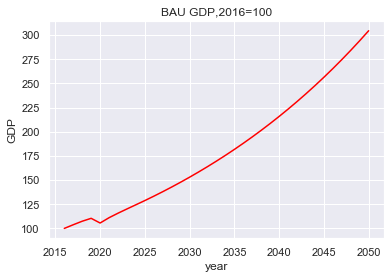

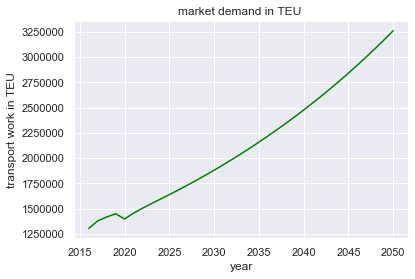

In [24]:
#======> Plotting BAU GDP,2016=100
sns.set()
ax=sns.lineplot(x=year ,y =gdp, color = 'red')
ax.set(xlabel='year', ylabel='GDP')
plt.title("BAU GDP,2016=100" )
plt.show()

#======> Plotting Market Demand Projections in BAU senario: Y
ax=sns.lineplot(x=year ,y =Y, color = 'green')
ax.set(xlabel='year', ylabel='transport work in TEU')
plt.title("market demand in TEU " )
plt.show()


In [25]:
#2.Compute market Demand per firm:
market_demand_per_firm = firm_quota(s) 

In [26]:
# 3. Simulation Calibration; 'Input Fuel Decision type Per firm' 
fuel_choice = np.array(["HFO" , "HFO"]) # No compliance

In [27]:
# 3.Solve for BAU per firm
for firm_id in range(n_firm):
    # 1. select firm level vector demand in each period for each firm  
    x = market_demand_per_firm[:,firm_id]
    
    #############################################################################################################
    #                      Decision Variable Initialisatiom  #
    ###############################################################################################################      
    BAU_speed_in= np.array([15.08 for j in range(T)]) # knots  
    q = x
    
    ##############################################################################################################
    #                       Optimisation Algorithm for solving for vessel Speed #
    ###############################################################################################################
    #===============> #3. Vessel Speed levels should be between V_min and V_max 0
    bnds = [(V_min[firm_id], V_max[firm_id])]*T
    #===============> # 4. Solve for the Optimum BAU vessel speed for firm id
    #BAU = minimize(dis_payoff_firm, BAU_speed_in, method='SLSQP', options={'xtol': 1e-8, 'disp': True} ,bounds=bnds,constraints=cons) 
    #===============> #5. Store Results for each firm
    
    ##############################################################################################################
    #                       Vessel Speed Solution  # 
    ###############################################################################################################
    #'place holder till I figure out the optimisation algorithm'
    #BAU_vessel_speed_optimum[:,firm_id] = BAU.x
    #print("The optimum vessel speed per firm is ",BAU_vessel_speed_optimum)
    BAU_vessel_speed_optimum[:,firm_id] = BAU_speed_in
    
    ##############################################################################################################
    #                       Store Results for the solved Vessel Speed  #
    ###############################################################################################################
    vessel_supply_BAU_optimum[:,firm_id],q_BAU_optimum[:,firm_id], \
    rev_BAU_optimum[:,firm_id],F_BAU_optimum[:,firm_id],C_BAU_optimum[:,firm_id],E_car_BAU_optimum[:,firm_id], \
    E_sulfur_BAU_optimum[:,firm_id],payoff_BAU_optimum[:,firm_id],NPV_payoff_BAU_optimum[0,firm_id] = dis_Results(BAU_vessel_speed_optimum[:,firm_id],q)
      
    #print("fuelconsum",F_BAU_optimum)
    #print(BAU)
    #print('The total payoff of the coalition : ',- BAU.fun) #-total_payoff_BAU
    #print('Vessel speed for firm', firm_id  ,'is', BAU.x) # BAU_speed
    print('--------Next firm now')

--------Next firm now
--------Next firm now


# BAU: The benchmark : Plotting and Analysis

## 1. Market and firm level Demand

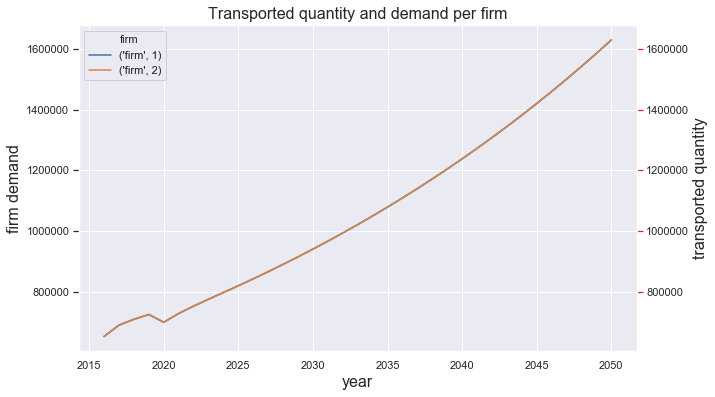

In [28]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'

##############################################################
#   Firm Demand
#############################################################
#======> convert array to pandas dataframe
firm_demand_df = pd.DataFrame()
firm_demand_df['year'] = year.tolist()
for i in range (n_firm):
    firm_demand_df["firm", i+1] = market_demand_per_firm[:,i].tolist()

#======> Plotting the firm level demand
ax1.set_title('Transported quantity and demand per firm', fontsize=16)
ax1.set_xlabel('year', fontsize=16)
ax1.set_ylabel('Transport demand', fontsize=16)
ax1 = sns.lineplot('year', 'firm demand', hue='firm', data=pd.melt(firm_demand_df, 'year', var_name='firm',value_name='firm demand'),palette='summer')
ax1.tick_params(axis='y')    


##############################################################
#   Firm Tranported Qty
#############################################################
#======> convert array to pandas dataframe
q_BAU_optimum_df = pd.DataFrame()
q_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    q_BAU_optimum_df["firm", i+1] = q_BAU_optimum[:,i].tolist()

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#======> Plotting the firm level vessel supply
ax2.set_ylabel('Transported Qty per firm', fontsize=16)
ax2 = sns.lineplot('year', 'transported quantity', hue='firm', data=pd.melt(q_BAU_optimum_df, 'year', var_name='firm',value_name='transported quantity'), color = color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


## 1. Vessel Speed

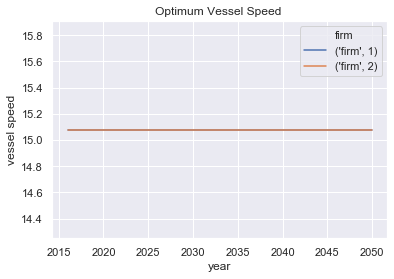

In [29]:
##############################################################
#   Plotting Optimum Vessel Speed  
############################################################# 
#======> convert array to pandas dataframe
optimum_speed_vessel_df = pd.DataFrame()
optimum_speed_vessel_df['year'] = year.tolist()
for i in range (n_firm):
    optimum_speed_vessel_df["firm", i+1] = BAU_vessel_speed_optimum[:,i].tolist()
    
#======> Plotting the firm level demand
sns.lineplot('year', 'vessel speed', hue='firm', data=pd.melt(optimum_speed_vessel_df, 'year', var_name='firm',value_name='vessel speed'))
plt.title("Optimum Vessel Speed " )
plt.show()
#BAU_vessel_speed_optimum
#timum_speed_vessel_df

## 2.Vessel Supply

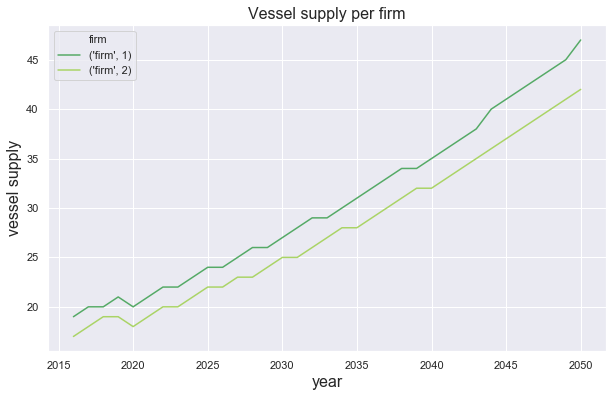

In [30]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'

##############################################################
#   Vessel supply
#############################################################
#======> convert array to pandas dataframe
vessel_supply_BAU_optimum_df = pd.DataFrame()
vessel_supply_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    vessel_supply_BAU_optimum_df["firm", i+1] = vessel_supply_BAU_optimum[:,i].tolist()

#======> Plotting the firm level supply
ax1.set_title('Vessel supply per firm', fontsize=16)
ax1.set_xlabel('year', fontsize=16)
ax1.set_ylabel('vessel supply', fontsize=16)
ax1 = sns.lineplot('year', 'vessel supply', hue='firm', data=pd.melt(vessel_supply_BAU_optimum_df, 'year', var_name='firm',value_name='vessel supply'),palette='summer')
ax1.tick_params(axis='y')    


## 2. Fuel Consumption 

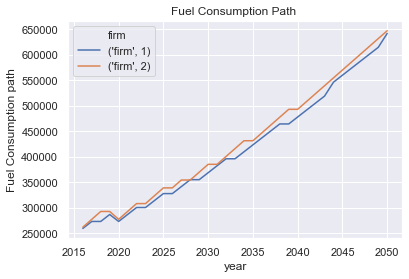

In [31]:
##############################################################
#   Plotting firm level BAU Fuel Consumption 
#############################################################
#======> convert array to pandas dataframe
F_BAU_optimum_df = pd.DataFrame()
F_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    F_BAU_optimum_df["firm", i+1] = F_BAU_optimum[:,i].tolist()
    
#=======> Displaying Results in a table :
#display(F_BAU_optimum_df)

#======> Plotting Emmission path
sns.lineplot('year', 'Fuel Consumption path', hue='firm', data=pd.melt(F_BAU_optimum_df, 'year', var_name='firm',value_name='Fuel Consumption path'))
plt.title("Fuel Consumption Path " )
plt.show()

# 3.Firm BAU emmission path

### Sulfur Emissions 

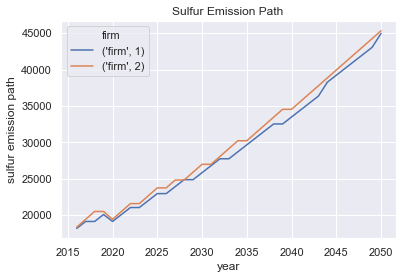

In [32]:
##############################################################
#   Plotting Sulfur Emission Paths
############################################################# 
#======> convert array to pandas dataframe
E_sulfur_BAU_optimum_df = pd.DataFrame()
E_sulfur_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    E_sulfur_BAU_optimum_df["firm", i+1] = E_sulfur_BAU_optimum[:,i].tolist()
    
#=======> Displaying Results in a table :
#display(E_sulfur_BAU_optimum_df)

#======> Plotting Emmission path
sns.lineplot('year', 'sulfur emission path', hue='firm', data=pd.melt(E_sulfur_BAU_optimum_df, 'year', var_name='firm',value_name='sulfur emission path'))
plt.title("Sulfur Emission Path " )
plt.show()


### CO2 Emissions 



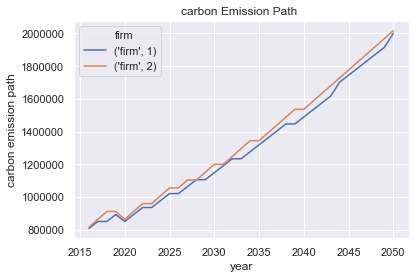

In [33]:
##############################################################
#   Plotting Co2 Emission Paths
############################################################# 
#======> convert array to pandas dataframe
E_car_BAU_optimum_df = pd.DataFrame()
E_car_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    E_car_BAU_optimum_df["firm", i+1] = E_car_BAU_optimum[:,i].tolist()
    
#=======> Displaying Results in a table :
#display(E_car_BAU_optimum_df)

#======> Plotting Emmission path
sns.lineplot('year', 'carbon emission path', hue='firm', data=pd.melt(E_car_BAU_optimum_df, 'year', var_name='firm',value_name='carbon emission path'))
plt.title("carbon Emission Path " )
plt.show()

## 6. Profits

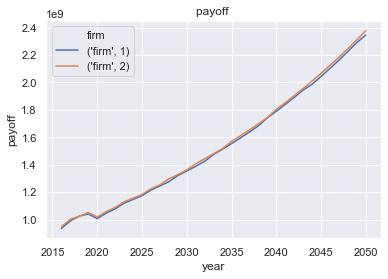

In [34]:
##############################################################
#   Plotting  firm payoffs
############################################################# 
#======> convert array to pandas dataframe
payoff_BAU_optimum_df = pd.DataFrame()
payoff_BAU_optimum_df['year'] = year.tolist()
for i in range (n_firm):
    payoff_BAU_optimum_df["firm", i+1] = payoff_BAU_optimum[:,i].tolist()
    
#=======> Displaying Results in a table :
#display(E_car_BAU_optimum_df)

#======> Plotting Emmission path
sns.lineplot('year', 'payoff', hue='firm', data=pd.melt(payoff_BAU_optimum_df, 'year', var_name='firm',value_name='payoff'))
plt.title("payoff " )
plt.show()


# Coalition & Abatement Anlysis 

# 1. Structures

In [35]:
#############################################################
#    I. Generate Coalition Structure vector            #
#############################################################
#"Singerons are denoted by '0' while signatories are denoted by '1'"
coalition_stru =np.asarray([list(i) for i in itertools.product([0, 1], repeat=n_firm)])
All_singelton = coalition_stru[0]
Grand_coalition  = coalition_stru[-1]
coalition_stru
#coalition_stru[3]

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

# 2.Coaltion and Singleton

In [36]:
#################################################################################
#    II. Run the simulation for each agent -No feedback loop of the pollution    #
##################################################################################
for compteur in range (len(coalition_stru)): 
    #print(coalition_stru[compteur])
    #''' 1. Identify signatory firms '''
    signatory = np.where(coalition_stru[compteur] == 1) # Resultat: signatory = [firm1, firm 2] ; signatory = []
    #''' 2. Run the optimisation problem for signartories to max the profit of the coalition '''
    optimisation_coalition(signatory) #function taking the firms in the signatory and gives results after solving for the optimum value
    
    #''' 3. Identify singleton firms '''
    singleton = np.where(coalition_stru[compteur] == 0)
    #4.''' Run the optimisation problem for singelton to max own profit '''
    optimisation_coalition(singleton)

NameError: name 'optimisation_coalition' is not defined

# I.Business Case 1: No enforcement mechanism 

##### 1.Condition to become a signatory: 
By joining the coalition, each firm agrees to abate by the following constraint: 
$$E^{industry}_{SO_x} \leq \theta_{SO_x}$$
$$E^{industry}_{CO_2} \leq \theta_{CO_2} $$

- $ \theta $ : the coalition emission threshhold for $SO_x$ and $CO_2$

##### 2.Perks of joining the coalition: 
The coalition sets the freight rate and shares of market demand for signatorie ??
***For each firm i:*** 
$$ max_{(V_{t,i},q_{t,i},s_{t,i},\rho_t)} ~\ \pi_{i} =\sum_{firms} \sum_{t=1}^{T} (1+r_{t,i})^{-t} * [\rho_t * q_{t,i} - TC_{t,i}(V_{t,i})) - C_{delayed}*(x_{t,i} - q_{t,i})] $$


$ $

In [ ]:
# #################################################################################
# #  Main Code for Computing Vessel Speed assuming the coalition's payoff is impacted #
# #    by signatories and vice versa through Pollution and Damage functions #
# ##################################################################################
# # '''The coalition's payoff '' 
# def payoff_coaltion(speed_coalition): 
#     '''insert rest of code for coalition optimisation problem'''
#     return coalition_payoff


# # ''' Singeton's payoff '' 
# def payoff_singeltons(speed_singelton): 
#     (tax_carbon,tax_sulfur) = Taxation_scheme(speed_coalition,speed_singeltons,q_coalition, q_singeltons)
#     '''insert rest of code for singelton optimisation problem'''
#     return singelton_payoff

### II.Business Case 1: Imposing a tax

 <font color='red'>

Assume the existence of a regulatory agent govering the market, with the objective of minimising the indutry's emmision level of sulfur and carbon 

Assume the profits from the taxation scheme of the regulatory body would go to finance R&D in maritime shipping   

we assume that the tax for sulfur and caron is a function of the industry's emmision
 
Need more research to specify g. This will allow for the non-cooperative game between the coalition and singelton 

### Taxation Scheme Model:
$$ tax_{SO_x} = g(E^{industry}_{SO_x}) $$
$$ tax_{CO_2} = g(E^{industry}_{CO_2}) $$

Assumes a non copperative game between the coalition and the singeltons

In [ ]:
''' Taxation Scheme '''
def Taxation_scheme(speed_coalition,speed_singeltons,q_coalition, q_singeltons): 
    '''This function will be be incorporated into the objective funtion'''
    # "1.Compute the singleton’s total emission levels"
    # "2.Compute the coalition total emission levels"
    # "3.Compute the industry’s emission levels"
    # "4.Compute sulfur and carbon tax  for the industry
    return tax

In [ ]:
# #################################################################################
# #  Main Code for Computing Vessel Speed assuming the coalition's payoff is impacted #
# #    by signatories and vice versa through Pollution and Damage functions #
# ##################################################################################

# # '''The coalition's payoff '' 
# def payoff_coaltion(speed_coalition): 
#     (tax_carbon,tax_sulfur) = Taxation_scheme(speed_coalition,speed_singeltons,q_coalition, q_singeltons)
#     '''insert rest of code for coalition optimisation problem'''
#     return coalition_payoff

# # ''' Singeton's payoff '' 
# def payoff_singeltons(speed_singelton): 
#     (tax_carbon,tax_sulfur) = Taxation_scheme(speed_coalition,speed_singeltons,q_coalition, q_singeltons)
#     '''insert rest of code for singelton optimisation problem'''
#     return singelton_payoff

# # '''Initilzation''' 
# speed_coalition_init = np.array([0])
# speed_singelton_init = np.array([0])

# speed_singelton = speed_singelton_init
# speed_coalition = speed_coalition_init 

# q_coalition = q_coalition_init
# q_singeltons = q_coalition_init


# change_speed_coalition= 2
# change_speed_singelton= 2

# #'''Solving for the optimum speed given the other agents' reaction  ''' #Reaction Functions
# #while abs(change_speed_coalition) > 0.001 or abs(change_speed_singelton) > 0.001  :
# #     moo = speed_coalition
# #     zoo = speed_singelton
# #     res1 = minimize(payoff_coaltion, speed_coalition_init, method='nelder-mead')
# #     speed_coalition =res1.x
# #     #print ("Coalition Speed is", speed_coalition, "The coalition's payoff is ",payoff_coaltion(speed_coalition) )
# #     #print ("singelton speed ", speed_singelton, "Singelton's payoff is ",payoff_singeltons(speed_singelton))
# #     #print ('######################################################################')
# #     res2 =  minimize(payoff_singeltons, speed_singelton_init, method='nelder-mead')
# #     speed_singelton = res2.x
# #     #print ("Coalition Speed is", speed_coalition, "The coalition's payoff is ",payoff_coaltion(speed_coalition) )
# #     #print ("singelton speed ", speed_singelton, "Singelton's payoff is ",payoff_singeltons(speed_singelton))
# #     #print ('######################################################################')
# #     change_speed_coalition = speed_coalition - moo
# #     change_speed_singelton= speed_singelton - zoo
# #     #print ('change is ',change_speed_coalition)

# Analysis: Who bared the cost of abatement: 

## 1. Marginal Abatement Costs

$$ MAC^{CO_2}_{i} = \frac{ \sum_t \pi_t^{No_{abatement}} -  \pi_t^{abatement}}{CO_2^{BAU} - CO_2}  $$

$$ MAC^{SO_x}_{i} = \frac{ \sum_t \pi_t^{No_{abatement}} -  \pi_t^{abatement}}{SO_x^{BAU} - SO_x}  $$



## 2. Passthrough: who bares the cost
the cost pass-through theory is useful, but the estimation of the
allocation share requires a set of assumptions on the price elasticity of supply and demand.
The price elasticity of supply and demand can be expressed as:
$$ \eta_s  = \frac{\% change ~\ in ~\ quantity ~\ supplied}{\% change ~\ in ~\ price}$$
$$ \eta_d  = \frac{\% change ~\ in ~\ quantity ~\ demanded}{\% change ~\ in ~\ price}$$


the amount of tax that will be borne by the shipper and ship-owner or ship-operator at period t.


 the fraction of the levy costs borne by the consumer, $\epsilon$ : 
$$ \epsilon = \frac{\eta_s} {\eta_d + \eta_s} $$

